In [208]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from yellowbrick.classifier import ConfusionMatrix
from sklearn.linear_model import ElasticNet
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score, f1_score
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import RFE

In [2]:
data = pd.read_csv('./sph6004_assignment1_data.csv')
data

,id,aki,gender,admission_age,race,heart_rate_min,heart_rate_max,heart_rate_mean,sbp_min,sbp_max,...,ggt_max,ld_ldh_min,ld_ldh_max,gcs_min,gcs_motor,gcs_verbal,gcs_eyes,gcs_unable,height,weight_admit
0,36570066,3,F,79.953141,BLACK/AFRICAN AMERICAN,96.0,104.0,100.083333,103.0,126.0,...,NaN,236.0,318.0,15.0,6.0,5.0,4.0,0.0,157.0,110.0
1,39307659,0,F,78.194169,WHITE - RUSSIAN,72.0,134.0,97.263158,97.0,127.0,...,NaN,NaN,NaN,15.0,6.0,5.0,4.0,0.0,NaN,82.0
2,38743306,2,F,65.602396,WHITE,60.0,97.0,84.166667,95.0,143.0,...,NaN,NaN,NaN,15.0,6.0,5.0,4.0,0.0,NaN,62.1
3,32339865,2,F,64.906629,UNKNOWN,59.0,87.0,71.461538,113.0,150.0,...,NaN,NaN,NaN,15.0,1.0,0.0,1.0,1.0,170.0,113.1
4,35526987,2,M,57.438861,WHITE,57.0,100.0,82.387097,81.0,127.0,...,NaN,NaN,NaN,15.0,NaN,0.0,1.0,1.0,178.0,97.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50915,33431859,0,M,66.174854,WHITE,46.0,104.0,84.652174,99.0,162.0,...,NaN,NaN,NaN,13.0,6.0,3.0,4.0,0.0,NaN,107.7
50916,38881410,2,F,57.033913,WHITE,94.0,112.0,102.040000,89.0,108.0,...,NaN,NaN,NaN,15.0,6.0,0.0,2.0,1.0,NaN,44.2
50917,31061555,0,F,55.399450,WHITE,68.0,162.0,91.666667,83.0,132.0,...,NaN,NaN,NaN,3.0,1.0,1.0,1.0,0.0,NaN,80.0
50918,32355547,3,F,66.058622,PORTUGUESE,58.0,82.0,65.076923,92.0,152.0,...,NaN,276.0,276.0,14.0,6.0,5.0,3.0,0.0,NaN,95.1


In [3]:
data['aki'] = data['aki'].replace([1, 2, 3], 1)
data.drop(columns = ['id','race'],inplace = True)

### handle missing values

In [4]:
missing_count = data.isna().sum()
missing_df = (pd.concat([missing_count.rename('Missing count'),
                     missing_count.div(len(data))
                          .rename('Missing ratio')],axis = 1)
             .loc[missing_count.ne(0)])
missing_df.style.background_gradient(cmap="cool")

,Missing count,Missing ratio
heart_rate_min,79,0.001551
heart_rate_max,79,0.001551
heart_rate_mean,79,0.001551
sbp_min,97,0.001905
sbp_max,97,0.001905
sbp_mean,97,0.001905
dbp_min,97,0.001905
dbp_max,97,0.001905
dbp_mean,97,0.001905
mbp_min,115,0.002258


In [5]:
missing_df[missing_df['Missing count']>0]

,Missing count,Missing ratio
heart_rate_min,79,0.001551
heart_rate_max,79,0.001551
heart_rate_mean,79,0.001551
sbp_min,97,0.001905
sbp_max,97,0.001905
...,...,...
gcs_verbal,513,0.010075
gcs_eyes,378,0.007423
gcs_unable,235,0.004615
height,25909,0.508818


In [6]:
missing_count = data.isna().sum()
missing_ratio = missing_count.div(len(data))

missing_df = pd.concat([missing_count.rename('Missing count'),
                        missing_ratio.rename('Missing ratio')],
                       axis=1)

high_missing_columns = missing_df[missing_ratio > 0.6].index

print("Columns with missing ratio > 60%:")
print(high_missing_columns)

data2 = data.drop(columns=high_missing_columns)


Columns with missing ratio > 60%:
Index(['so2_min', 'so2_max', 'aado2_min', 'aado2_max', 'bicarbonate_min',
       'bicarbonate_max', 'hematocrit_min', 'hematocrit_max', 'hemoglobin_min',
       'hemoglobin_max', 'carboxyhemoglobin_min', 'carboxyhemoglobin_max',
       'methemoglobin_min', 'methemoglobin_max', 'temperature_min.1',
       'temperature_max.1', 'chloride_min', 'chloride_max', 'calcium_min',
       'calcium_max', 'glucose_min.1', 'glucose_max.1', 'potassium_min',
       'potassium_max', 'sodium_min', 'sodium_max', 'albumin_min',
       'albumin_max', 'globulin_min', 'globulin_max', 'total_protein_min',
       'total_protein_max', 'atyps_min', 'atyps_max', 'bands_min', 'bands_max',
       'imm_granulocytes_min', 'imm_granulocytes_max', 'metas_min',
       'metas_max', 'nrbc_min', 'nrbc_max', 'd_dimer_min', 'd_dimer_max',
       'fibrinogen_min', 'fibrinogen_max', 'thrombin_min', 'thrombin_max',
       'amylase_min', 'amylase_max', 'bilirubin_direct_min',
       'bilirubin_d

In [7]:
columns_missing = data2.columns[data2.isnull().any()]
median_values = data2[columns_missing].median()
data2[columns_missing] = data2[columns_missing].fillna(median_values)

### Label Encoding & Filter Low Variance Features  

In [8]:
label_encoder = LabelEncoder()
for col in ['gender']:
    data2[col] = label_encoder.fit_transform(data2[col])

In [9]:
from sklearn.feature_selection import VarianceThreshold

X = data2.drop(columns=['aki'])
threshold = 0.1  
selector = VarianceThreshold(threshold)

X_selected = selector.fit_transform(X)

selected_indices = selector.get_support(indices=True)

selected_features  = X.columns[selected_indices]

deleted_features = [col for col in X.columns if col not in selected_features]
data2.drop(columns = deleted_features,inplace = True)
print("Selected features：", selected_features)
print("Deleted features：", deleted_features)

Selected features： Index(['gender', 'admission_age', 'heart_rate_min', 'heart_rate_max',
       'heart_rate_mean', 'sbp_min', 'sbp_max', 'sbp_mean', 'dbp_min',
       'dbp_max', 'dbp_mean', 'mbp_min', 'mbp_max', 'mbp_mean',
       'resp_rate_min', 'resp_rate_max', 'resp_rate_mean', 'temperature_min',
       'temperature_max', 'temperature_mean', 'spo2_min', 'spo2_max',
       'spo2_mean', 'glucose_min', 'glucose_max', 'glucose_mean',
       'lactate_min', 'lactate_max', 'po2_min', 'po2_max', 'pco2_min',
       'pco2_max', 'aado2_calc_min', 'aado2_calc_max', 'pao2fio2ratio_min',
       'pao2fio2ratio_max', 'baseexcess_min', 'baseexcess_max', 'totalco2_min',
       'totalco2_max', 'hematocrit_min.1', 'hematocrit_max.1',
       'hemoglobin_min.1', 'hemoglobin_max.1', 'platelets_min',
       'platelets_max', 'wbc_min', 'wbc_max', 'aniongap_min', 'aniongap_max',
       'bicarbonate_min.1', 'bicarbonate_max.1', 'bun_min', 'bun_max',
       'calcium_min.1', 'calcium_max.1', 'chloride_min.1', 

In [10]:
data2

,aki,gender,admission_age,heart_rate_min,heart_rate_max,heart_rate_mean,sbp_min,sbp_max,sbp_mean,dbp_min,...,ast_max,bilirubin_total_min,bilirubin_total_max,gcs_min,gcs_motor,gcs_verbal,gcs_eyes,gcs_unable,height,weight_admit
0,1,0,79.953141,96.0,104.0,100.083333,103.0,126.0,116.136364,40.0,...,196.0,6.8,17.0,15.0,6.0,5.0,4.0,0.0,157.0,110.0
1,0,0,78.194169,72.0,134.0,97.263158,97.0,127.0,109.833333,56.0,...,356.0,1.9,2.9,15.0,6.0,5.0,4.0,0.0,170.0,82.0
2,1,0,65.602396,60.0,97.0,84.166667,95.0,143.0,112.153846,56.0,...,40.0,0.6,0.7,15.0,6.0,5.0,4.0,0.0,170.0,62.1
3,1,0,64.906629,59.0,87.0,71.461538,113.0,150.0,138.160000,60.0,...,18.0,0.7,0.7,15.0,1.0,0.0,1.0,1.0,170.0,113.1
4,1,1,57.438861,57.0,100.0,82.387097,81.0,127.0,97.672131,47.0,...,21.0,0.6,0.6,15.0,6.0,0.0,1.0,1.0,178.0,97.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50915,0,1,66.174854,46.0,104.0,84.652174,99.0,162.0,130.038462,52.0,...,16.0,0.2,0.2,13.0,6.0,3.0,4.0,0.0,170.0,107.7
50916,1,0,57.033913,94.0,112.0,102.040000,89.0,108.0,97.500000,54.0,...,98.0,1.6,1.8,15.0,6.0,0.0,2.0,1.0,170.0,44.2
50917,0,0,55.399450,68.0,162.0,91.666667,83.0,132.0,113.000000,43.0,...,210.0,0.4,0.4,3.0,1.0,1.0,1.0,0.0,170.0,80.0
50918,1,0,66.058622,58.0,82.0,65.076923,92.0,152.0,112.916667,48.0,...,22.0,1.7,1.7,14.0,6.0,5.0,3.0,0.0,170.0,95.1


In [11]:
data2['aki'].value_counts()

aki
1    34060
0    16860
Name: count, dtype: int64

### Correlation Analysis

In [12]:
data_fl = [col for col in data2.columns]

In [13]:
data2[np.intersect1d(data2.columns, data2.columns)].corr().style.background_gradient(cmap='Oranges')

,aado2_calc_max,aado2_calc_min,abs_lymphocytes_max,abs_lymphocytes_min,abs_monocytes_max,abs_monocytes_min,abs_neutrophils_max,abs_neutrophils_min,admission_age,aki,alp_max,alp_min,alt_max,alt_min,aniongap_max,aniongap_min,ast_max,ast_min,baseexcess_max,baseexcess_min,bicarbonate_max.1,bicarbonate_min.1,bilirubin_total_max,bilirubin_total_min,bun_max,bun_min,calcium_max.1,calcium_min.1,chloride_max.1,chloride_min.1,dbp_max,dbp_mean,dbp_min,gcs_eyes,gcs_min,gcs_motor,gcs_unable,gcs_verbal,gender,glucose_max,glucose_max.2,glucose_mean,glucose_min,glucose_min.2,heart_rate_max


In [14]:
high_correlated_col = ['abs_lymphocytes_max','abs_monocytes_max','abs_neutrophils_max','alp_min','alt_min','ast_min',
                      'bicarbonate_min.1','bilirubin_total_max','bun_max','heart_rate_mean','hematocrit_max.1','hemoglobin_min.1','mbp_mean',
                      'mbp_min','platelets_max','pt_max','pt_min','temperature_max','totalco2_max','totalco2_min','wbc_max']

In [15]:
data2.drop(columns=high_correlated_col,inplace=True)

In [63]:
data2[np.intersect1d(data2.columns, data2.columns)].corr().style.background_gradient(cmap='Oranges')

,aado2_calc_max,aado2_calc_min,abs_lymphocytes_min,abs_monocytes_min,abs_neutrophils_min,admission_age,aki,alp_max,alt_max,aniongap_max,aniongap_min,ast_max,baseexcess_max,baseexcess_min,bicarbonate_max.1,bilirubin_total_min,bun_min,calcium_max.1,calcium_min.1,chloride_max.1,chloride_min.1,dbp_max,dbp_mean,dbp_min,gcs_eyes,gcs_min,gcs_motor,gcs_unable,gcs_verbal,gender,glucose_max,glucose_max.2,glucose_mean,glucose_min,glucose_min.2,heart_rate_max,heart_rate_min,height,hematocrit_min.1,hemoglobin_max.1,inr_max,inr_min,lactate_max,lactate_min,mbp_max,pao2fio2ratio_max,pao2fio2ratio_min,pco2_max,pco2_min,platelets_min,po2_max,po2_min,potassium_max.1,potassium_min.1,ptt_max,ptt_min,resp_rate_max,resp_rate_mean,resp_rate_min,sbp_max,sbp_mean,sbp_min,sodium_max.1,sodium_min.1,spo2_max,spo2_mean,spo2_min,temperature_mean,temperature_min,wbc_min,weight_admit
aado2_calc_max,1.000000,0.532491,0.021187,0.002746,0.052914,0.043038,0.080180,0.000790,0.036696,0.048278,0.023068,0.061328,-0.034764,-0.188187,-0.056865,0.016188,0.045114,0.005753,-0.043040,0.039694,0.008582,-0.052291,-0.080105,-0.083361,-0.089617,-0.022211,-0.151689,0.048970,-0.043360,0.055451,0.006463,0.040321,0.000003,-0.006174,0.026090,0.036565,0.034734,0.034304,-0.055827,0.011852,0.073076,0.046922,0.194149,0.112861,-0.014269,-0.386869,-0.662598,0.147583,-0.066845,-0.067144,0.062447,-0.208228,0.087218,0.062566,0.098011,0.058473,0.094137,0.146054,0.040322,-0.061132,-0.125348,-0.139983,-0.016431,-0.026103,-0.052527,-0.185813,-0.179696,-0.052869,-0.077209,0.036069,0.064817
aado2_calc_min,0.532491,1.000000,0.017270,0.031058,0.038239,0.041773,0.042709,0.029387,0.012807,0.083305,0.111579,0.019349,-0.078943,-0.034369,-0.018908,0.036369,0.084495,-0.012973,-0.023036,-0.066127,-0.052299,0.024854,-0.005379,-0.034679,0.025733,-0.006689,0.011047,-0.040628,0.034361,0.007433,-0.001494,0.042731,0.004099,-0.001069,0.050382,0.065597,0.060644,-0.000845,0.061909,0.006965,0.048528,0.075722,0.054155,0.136385,-0.015411,-0.774570,-0.452725,0.047099,0.109275,0.041622,-0.250029,-0.112662,0.017428,0.015031,0.041554,0.071304,0.115461,0.185538,0.130757,-0.026250,-0.047988,-0.051858,-0.016328,-0.014189,-0.136540,-0.271511,-0.191121,0.013479,0.032395,0.054366,0.043464
abs_lymphocytes_min,0.021187,0.017270,1.000000,0.107070,0.015113,0.010247,-0.002801,-0.009997,-0.007891,-0.002450,-0.004934,-0.008403,-0.000273,-0.008225,-0.004146,-0.014385,-0.007017,0.011350,0.013624,0.015554,0.014153,-0.009728,-0.011579,-0.009989,-0.009212,-0.004477,-0.016112,0.004620,-0.004398,0.002015,-0.001254,-0.003667,-0.000951,-0.000411,0.001243,-0.004887,-0.010443,0.002165,-0.010522,-0.004922,-0.002101,-0.001650,0.003536,-0.002628,-0.005423,-0.010574,-0.009221,0.007547,-0.004942,-0.013306,0.016150,-0.002602,0.008687,0.012201,0.001584,0.012833,0.003395,0.002750,-0.005302,-0.003331,-0.005157,-0.004788,0.008056,0.011264,-0.005745,-0.006953,-0.003217,0.006798,0.006639,0.564324,0.000552
abs_monocytes_min,0.002746,0.031058,0.107070,1.000000,0.296766,0.022384,0.025477,0.016154,-0.001935,0.081294,0.067443,0.003518,-0.032478,-0.038264,-0.037274,0.023578,0.048465,0.005802,-0.010197,-0.051548,-0.059421,0.011985,-0.002556,-0.004638,-0.004329,-0.005606,-0.004257,0.008119,-0.011817,0.019971,-0.000748,0.023868,-0.001331,-0.000555,0.012555,0.047033,0.038249,0.007130,0.008999,-0.002125,0.035133,0.028891,0.043301,0.043110,-0.003896,-0.041299,-0.038791,0.002301,0.003898,0.036682,-0.067024,-0.047808,0.031330,0.005206,0.023580,0.019328,0.054288,0.074080,0.050960,-0.010308,-0.017988,-0.021495,-0.012701,-0.027151,-0.014652,-0.035645,-0.026424,0.038699,0.044958,0.319006,0.011631
abs_neutrophils_min,0.052914,0.038239,0.015113,0.296766,1.000000,0.013211,0.064117,0.079735,0.029352,0.146004,0.100679,0.037263,-0.065503,-0.111612,-0.098352,0.035866,0.095122,-0.029915,-0.076109,-0.001126,-0.042970,-0.033681,-0.072071,-0.066142,-0.074799,-0.034022,-0.072411,0.068532,-0.084546,0.001580,-0.001291,0.090508,-0.001953,-0.000596,0.068815,0.102773,0.092682,0.005933,0.007

In [64]:
data2

,aki,gender,admission_age,heart_rate_min,heart_rate_max,sbp_min,sbp_max,sbp_mean,dbp_min,dbp_max,...,alp_max,ast_max,bilirubin_total_min,gcs_min,gcs_motor,gcs_verbal,gcs_eyes,gcs_unable,height,weight_admit
0,1,0,0.868796,1.724950,0.073730,0.556180,-0.978644,-0.181080,-0.625309,-1.544616,...,12.765507,0.053521,2.195521,0.488466,0.495929,0.766355,0.786547,-0.507323,-1.711276,0.795813
1,0,0,0.766992,0.138692,1.539611,0.213991,-0.934621,-0.566361,0.738435,0.032401,...,2.708247,0.238179,0.325871,0.488466,0.495929,0.766355,0.786547,-0.507323,0.024382,0.014652
2,1,0,0.038221,-0.654437,-0.268309,0.099928,-0.230257,-0.424516,0.738435,0.541117,...,-0.176843,-0.126520,-0.170158,0.488466,0.495929,0.766355,0.786547,-0.507323,0.024382,-0.540531
3,1,0,-0.002048,-0.720531,-0.756936,1.126496,0.077902,1.165145,1.079371,0.286759,...,-0.246363,-0.151911,-0.132002,0.488466,-2.521553,-1.630505,-1.928713,1.971129,0.024382,0.882299
4,1,1,-0.434258,-0.852719,-0.121721,-0.698514,-0.934621,-1.309731,-0.028671,0.337630,...,-0.431751,-0.148448,-0.170158,0.488466,0.495929,-1.630505,-1.928713,1.971129,1.092480,0.444290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50915,0,1,0.071353,-1.579753,0.073730,0.328054,0.606175,0.668705,0.397499,1.304190,...,-0.698245,-0.154219,-0.322783,-0.267749,0.495929,-0.192389,0.786547,-0.507323,0.024382,0.731646
50916,1,0,-0.457695,1.592762,0.464632,-0.242262,-1.771053,-1.320253,0.567967,-0.527186,...,-0.443337,-0.059582,0.211403,0.488466,0.495929,-1.630505,-1.023626,1.971129,0.024382,-1.039916
50917,0,0,-0.552292,-0.125684,2.907767,-0.584451,-0.714507,-0.372794,-0.369607,-0.120213,...,-0.408577,0.069679,-0.246470,-4.048825,-2.521553,-1.151133,-1.928713,-0.507323,0.024382,-0.041146
50918,1,0,0.064626,-0.786625,-1.001250,-0.071167,0.165947,-0.377888,0.056563,0.541117,...,-0.570791,-0.147294,0.249559,0.110358,0.495929,0.766355,-0.118539,-0.507323,0.024382,0.380124


# Modeling

## Logistic Regression

In [156]:
X = data2.drop('aki', axis = 1)
y = data2['aki']

In [157]:
data2

,aki,gender,admission_age,heart_rate_min,heart_rate_max,sbp_min,sbp_max,sbp_mean,dbp_min,dbp_max,...,alp_max,ast_max,bilirubin_total_min,gcs_min,gcs_motor,gcs_verbal,gcs_eyes,gcs_unable,height,weight_admit
0,1,0,0.868796,1.724950,0.073730,0.556180,-0.978644,-0.181080,-0.625309,-1.544616,...,12.765507,0.053521,2.195521,0.488466,0.495929,0.766355,0.786547,-0.507323,-1.711276,0.795813
1,0,0,0.766992,0.138692,1.539611,0.213991,-0.934621,-0.566361,0.738435,0.032401,...,2.708247,0.238179,0.325871,0.488466,0.495929,0.766355,0.786547,-0.507323,0.024382,0.014652
2,1,0,0.038221,-0.654437,-0.268309,0.099928,-0.230257,-0.424516,0.738435,0.541117,...,-0.176843,-0.126520,-0.170158,0.488466,0.495929,0.766355,0.786547,-0.507323,0.024382,-0.540531
3,1,0,-0.002048,-0.720531,-0.756936,1.126496,0.077902,1.165145,1.079371,0.286759,...,-0.246363,-0.151911,-0.132002,0.488466,-2.521553,-1.630505,-1.928713,1.971129,0.024382,0.882299
4,1,1,-0.434258,-0.852719,-0.121721,-0.698514,-0.934621,-1.309731,-0.028671,0.337630,...,-0.431751,-0.148448,-0.170158,0.488466,0.495929,-1.630505,-1.928713,1.971129,1.092480,0.444290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50915,0,1,0.071353,-1.579753,0.073730,0.328054,0.606175,0.668705,0.397499,1.304190,...,-0.698245,-0.154219,-0.322783,-0.267749,0.495929,-0.192389,0.786547,-0.507323,0.024382,0.731646
50916,1,0,-0.457695,1.592762,0.464632,-0.242262,-1.771053,-1.320253,0.567967,-0.527186,...,-0.443337,-0.059582,0.211403,0.488466,0.495929,-1.630505,-1.023626,1.971129,0.024382,-1.039916
50917,0,0,-0.552292,-0.125684,2.907767,-0.584451,-0.714507,-0.372794,-0.369607,-0.120213,...,-0.408577,0.069679,-0.246470,-4.048825,-2.521553,-1.151133,-1.928713,-0.507323,0.024382,-0.041146
50918,1,0,0.064626,-0.786625,-1.001250,-0.071167,0.165947,-0.377888,0.056563,0.541117,...,-0.570791,-0.147294,0.249559,0.110358,0.495929,0.766355,-0.118539,-0.507323,0.024382,0.380124


In [158]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [159]:
print(X_train.shape)

(35644, 70)


In [160]:
columns_stand = [col for col in data2.columns if col not in ['aki','gender','race']]
scaler = StandardScaler()
data2[columns_stand] = scaler.fit_transform(data2[columns_stand])

In [161]:
X_train

,gender,admission_age,heart_rate_min,heart_rate_max,sbp_min,sbp_max,sbp_mean,dbp_min,dbp_max,dbp_mean,...,alp_max,ast_max,bilirubin_total_min,gcs_min,gcs_motor,gcs_verbal,gcs_eyes,gcs_unable,height,weight_admit
23782,1,1.299104,0.072598,1.295298,-2.580556,0.253993,-0.948146,-0.540075,1.762033,-0.114704,...,-0.176843,-0.126520,-0.170158,-2.158287,-0.107567,-1.151133,-1.023626,-0.507323,-0.242642,-0.041146
47847,1,0.707096,-0.257872,0.024867,-1.611019,-0.626462,-0.382982,-1.051478,-0.018470,-0.586776,...,-0.176843,-0.126520,-0.170158,0.488466,0.495929,0.766355,0.786547,-0.507323,-0.910203,-0.579589
46077,0,-0.787783,-0.588343,-0.805799,-0.071167,-0.978644,-0.692318,1.164605,-0.069342,0.658819,...,-0.176843,-0.126520,-0.170158,0.488466,0.495929,0.766355,0.786547,-0.507323,0.024382,-0.967380
9422,1,1.196390,0.865727,-0.268309,-2.181335,-0.846576,-0.840231,-1.733350,-2.129639,-2.406463,...,0.135998,-0.151911,-0.132002,0.488466,-0.711064,-1.630505,-1.928713,1.971129,0.024382,-0.543321
7577,1,1.428824,4.897465,2.761179,-0.470388,-2.343349,-1.778700,-0.710542,-1.035901,-0.919839,...,-0.176843,-0.126520,-0.170158,-2.536395,-2.521553,0.286983,-1.023626,-0.507323,0.024382,-0.693973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21243,0,0.695326,0.667445,0.024867,0.841338,0.430084,1.197683,1.079371,0.591988,1.659730,...,-0.663485,-0.133445,-0.208314,0.110358,0.495929,0.766355,-0.118539,-0.507323,-1.043715,-0.194588
45891,1,-0.857500,0.403068,0.073730,-0.527419,-0.494394,-0.598962,-0.284373,-0.221956,-0.364624,...,-0.176843,-0.126520,-0.170158,0.488466,0.495929,-1.630505,-0.118539,1.971129,1.760041,0.767914
42613,0,1.162020,1.592762,0.024867,-0.698514,-0.934621,-0.864250,-1.307180,0.744603,-1.552430,...,-0.130496,-0.140369,-0.208314,0.110358,0.495929,0.286983,0.786547,-0.507323,-0.910203,-0.295023
43567,1,-1.901058,-0.059590,-0.952387,0.328054,-1.374849,-0.678426,1.846476,-0.832415,0.586329,...,-0.176843,-0.126520,-0.170158,0.488466,0.495929,0.766355,0.786547,-0.507323,0.024382,0.508457


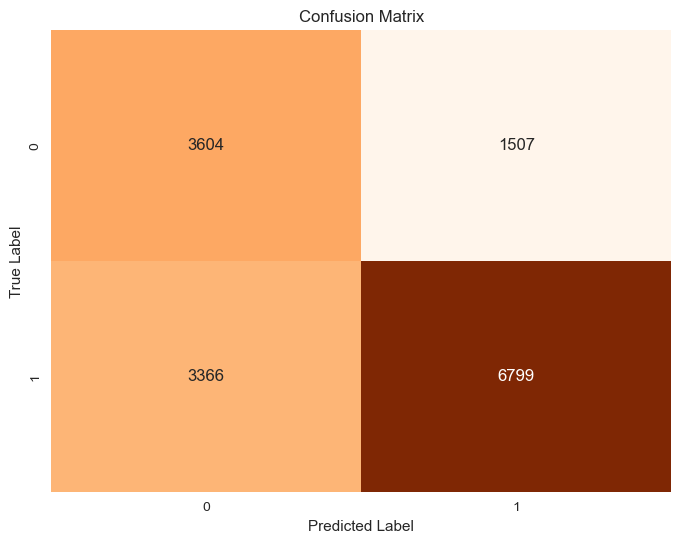

Cross-validation scores: [0.679899   0.68719315 0.67947819 0.68060036 0.67845118]


In [162]:
from sklearn.model_selection import cross_val_score

# Define your logistic regression model within the pipeline
logistic_l1 = LogisticRegression(random_state=1, max_iter=5000, penalty='l1', solver='liblinear', class_weight='balanced',C=1/10)

# Define your pipeline
pipeline = Pipeline([
    ("scaler", scaler),
    ("classifier", logistic_l1)
])

# Perform cross-validation
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5)

# Train the pipeline on the entire training set
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)


In [163]:
classification_lrl1 = (classification_report(y_test, y_pred))
print(classification_lrl1)

              precision    recall  f1-score   support

           0       0.52      0.71      0.60      5111
           1       0.82      0.67      0.74     10165

    accuracy                           0.68     15276
   macro avg       0.67      0.69      0.67     15276
weighted avg       0.72      0.68      0.69     15276



In [164]:
feature_coef = logistic_l1.coef_[0]
selected_features = data2.drop('aki', axis = 1).columns[feature_coef != 0]
delected_features = data2.drop('aki',axis=1).columns[feature_coef == 0]

In [165]:
print(delected_features,len(delected_features))

Index(['po2_min', 'po2_max', 'aniongap_min'], dtype='object') 3


[0.08383657 0.15893823 0.21278772 0.25864408 0.30028789 0.33822411
 0.37049853 0.40155447 0.43185906 0.46204447 0.48850188 0.51246876
 0.53555384 0.55810963 0.57979199 0.60024701 0.61938605 0.63803946
 0.65621913 0.6737789  0.6905878  0.70716876 0.72266541 0.73763108
 0.75228979 0.76613714 0.77964962 0.79242023 0.80464027 0.81633383
 0.82743018 0.83846626 0.84908735 0.8594443  0.86936687 0.87849213
 0.88733145 0.89527744 0.90240567 0.90910332 0.91542898 0.92121527
 0.92686299 0.93180683 0.93655355 0.94118761 0.94507904 0.94891922
 0.95268177 0.95636385 0.9598992  0.96333568 0.96667483 0.96995005
 0.97308157 0.97616079 0.97884765 0.98132824 0.98373329 0.98603547
 0.98813867 0.99015854 0.99210282 0.99397229 0.99542594 0.99678343
 0.99789961 0.99886805 0.99972471 1.        ]


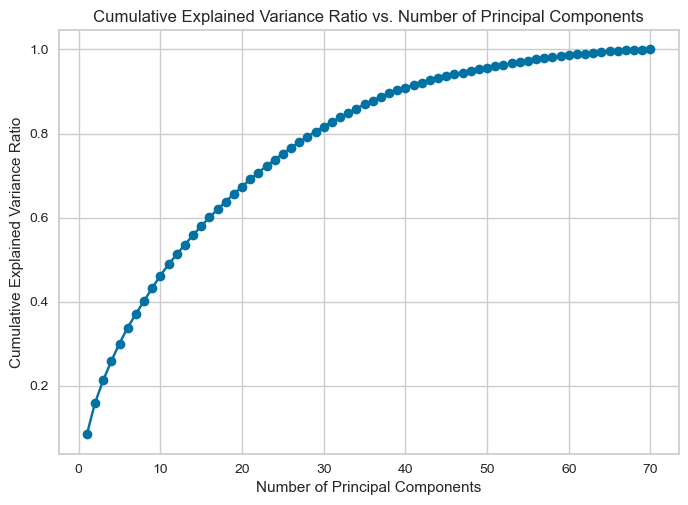

In [166]:
pca = PCA()
pca.fit(feature)

explained_variance_ratio = pca.explained_variance_ratio_



cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio)

print(cumulative_explained_variance_ratio)
plt.plot(range(1, len(cumulative_explained_variance_ratio) + 1), cumulative_explained_variance_ratio, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio vs. Number of Principal Components')
plt.grid(True)
plt.show()

In [167]:
pca = PCA(n_components=50, random_state=42)

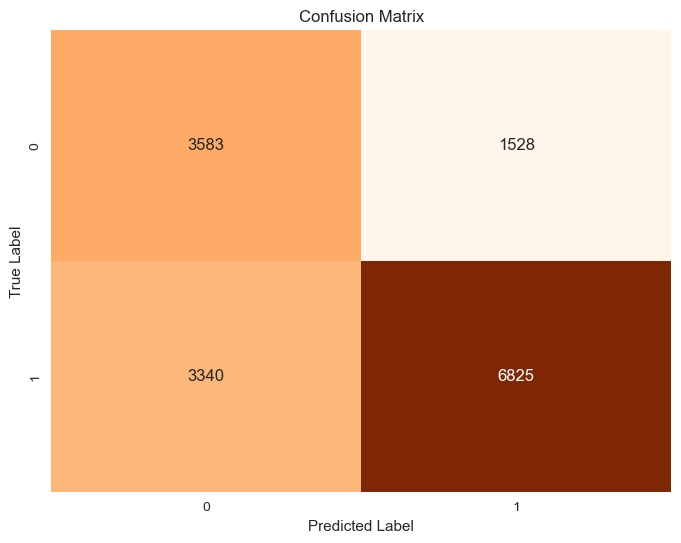

In [168]:
pipeline = Pipeline([
    ("scaler", scaler),
    ("pca",pca),
    ("classifier", logistic_l1)
])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [169]:
accuracy_lr = accuracy_score(y_test, y_pred)
precision_lr = precision_score(y_test, y_pred)
recall_lr = recall_score(y_test, y_pred)
f1_lr  = f1_score(y_test, y_pred)
auc_lr = roc_auc_score(y_test, y_pred)
print('f1 Score:',f1_lr)
print('AUC:',auc_lr)
print('accuracy', accuracy_lr)
print('Precision', precision_lr)
print('recall', recall_lr)
classification_lrl1 = (classification_report(y_test, y_pred))
print(classification_lrl1)

f1 Score: 0.7371206393779025
AUC: 0.6862292617901282
accuracy 0.6813301911495155
Precision 0.8170717107626002
recall 0.6714215445154943
              precision    recall  f1-score   support

           0       0.52      0.70      0.60      5111
           1       0.82      0.67      0.74     10165

    accuracy                           0.68     15276
   macro avg       0.67      0.69      0.67     15276
weighted avg       0.72      0.68      0.69     15276



In [50]:
# 3. Cross Validated RFE
selector = RFECV(logistic_l1, step=10, cv=3)       
selector = selector.fit(X, y)
X_wrapper = selector.transform(X)      
score =cross_val_score(logistic_l1 , X_wrapper, y, cv=3).mean()   
print(score)
print(selector.support_)                               
print(selector.n_features_)                            
print(selector.ranking_)   

/Users/miaoshujie/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/miaoshujie/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.6827572328878472
最佳数量和排序
[ True  True  True  True  True  True  True False False  True  True  True
  True  True  True  True  True  True  True False False False  True  True
 False False  True  True False False False False  True  True  True  True
 False  True False  True  True  True  True  True  True  True False False
  True  True  True  True  True  True False  True  True False  True False
 False False  True  True  True  True  True  True  True  True]
50
[1 1 1 1 1 1 1 2 3 1 1 1 1 1 1 1 1 1 1 3 3 3 1 1 3 3 1 1 2 3 2 2 1 1 1 1 2
 1 2 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 2 1 1 3 1 3 2 3 1 1 1 1 1 1 1 1]


In [175]:
selected_features = X.columns[selector.support_]
print("Selected features:", selected_features)

Selected features: Index(['gender', 'admission_age', 'heart_rate_min', 'heart_rate_max',
       'sbp_min', 'sbp_max', 'sbp_mean', 'dbp_mean', 'mbp_max',
       'resp_rate_min', 'resp_rate_max', 'resp_rate_mean', 'temperature_min',
       'temperature_mean', 'spo2_min', 'spo2_max', 'spo2_mean', 'lactate_min',
       'lactate_max', 'pco2_min', 'pco2_max', 'baseexcess_min',
       'baseexcess_max', 'hematocrit_min.1', 'hemoglobin_max.1', 'wbc_min',
       'aniongap_max', 'bicarbonate_max.1', 'bun_min', 'calcium_min.1',
       'calcium_max.1', 'chloride_min.1', 'chloride_max.1', 'sodium_min.1',
       'sodium_max.1', 'potassium_min.1', 'potassium_max.1',
       'abs_lymphocytes_min', 'abs_monocytes_min', 'inr_min', 'inr_max',
       'ptt_max', 'bilirubin_total_min', 'gcs_min', 'gcs_motor', 'gcs_verbal',
       'gcs_eyes', 'gcs_unable', 'height', 'weight_admit'],
      dtype='object')


In [176]:
X_selected = X_train[selected_features]
model = LogisticRegression(random_state=1, max_iter=5000, penalty='l1', solver='liblinear', class_weight='balanced')
score = cross_val_score(model, X_selected, y_train, cv=3).mean()
print("Score: ", score)

Score:  0.6819099739778123


## Decision Tree

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from yellowbrick.classifier import ConfusionMatrix


min_split = np.array([2, 3, 4, 5, 6, 7])
max_nvl = np.array([3, 4, 5, 6, 7, 9, 11])
alg = ['entropy', 'gini']
values_grid = {'min_samples_split': min_split, 'max_depth': max_nvl, 'criterion': alg}

model_dt = DecisionTreeClassifier()
gridDecisionTree = GridSearchCV(estimator = model_dt, param_grid = values_grid, cv = 5)
gridDecisionTree.fit(X_train, y_train)


print('Mín Split: ', gridDecisionTree.best_estimator_.min_samples_split)
print('Max Nvl: ', gridDecisionTree.best_estimator_.max_depth)
print('Algorithm: ', gridDecisionTree.best_estimator_.criterion)
print('Score: ', gridDecisionTree.best_score_)

Mín Split:  2
Max Nvl:  7
Algorithm:  gini
Score:  0.705167717290736


/Users/miaoshujie/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.708038753600419

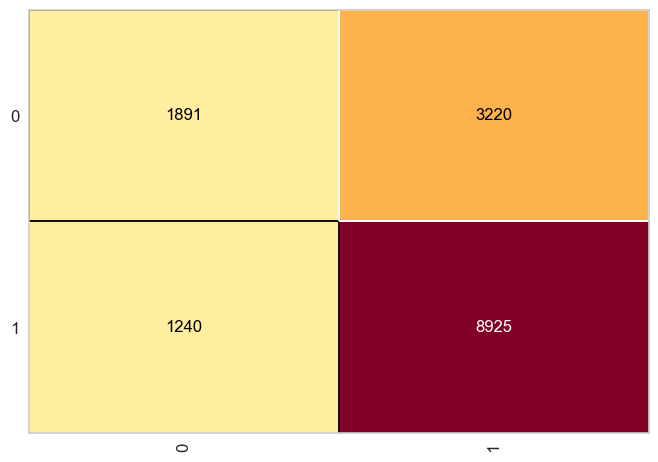

In [195]:
decision_tree = DecisionTreeClassifier(**gridDecisionTree.best_params_,
                                       random_state=0)
decision_tree.fit(X_train, y_train)
prd_dt = decision_tree.predict(X_test)

cm = ConfusionMatrix(decision_tree)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [196]:
accuracy_dt = accuracy_score(y_test, prd_dt)
precision_dt = precision_score(y_test, prd_dt)
recall_dt = recall_score(y_test, prd_dt)
f1_dt  = f1_score(y_test, prd_dt)
auc_dt = roc_auc_score(y_test, prd_dt)
print('f1 Score:',f1_dt)
print('AUC:',auc_dt)
print('accuracy', accuracy_dt)
print('Precision', precision_dt)
print('recall', recall_dt)

f1 Score: 0.8000896458987001
AUC: 0.6239995465159441
accuracy 0.708038753600419
Precision 0.7348703170028819
recall 0.8780127889818002


In [197]:
classification_decision = (classification_report(y_test, prd_dt))
print(classification_decision)

              precision    recall  f1-score   support

           0       0.60      0.37      0.46      5111
           1       0.73      0.88      0.80     10165

    accuracy                           0.71     15276
   macro avg       0.67      0.62      0.63     15276
weighted avg       0.69      0.71      0.69     15276



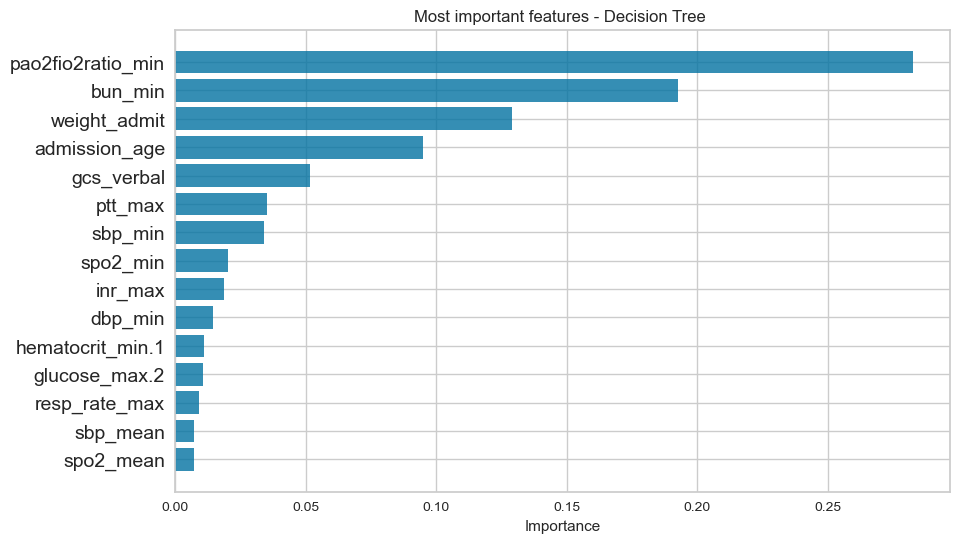

In [199]:
columns = X.columns
feature_imports = decision_tree.feature_importances_
most_imp_features = pd.DataFrame([f for f in zip(columns,feature_imports)], columns=["Feature", "Importance"]).nlargest(15, "Importance")
most_imp_features.sort_values(by="Importance", inplace=True)
plt.figure(figsize=(10,6))
plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=0.8)
plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14)
plt.xlabel('Importance')
plt.title('Most important features - Decision Tree ')
plt.show()

In [202]:
importances = decision_tree.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df[feature_importance_df['Importance']>0])

                Feature  Importance
30    pao2fio2ratio_min    0.282683
41              bun_min    0.192575
69         weight_admit    0.129177
1         admission_age    0.095050
65           gcs_verbal    0.051900
58              ptt_max    0.035102
4               sbp_min    0.034055
16             spo2_min    0.020294
56              inr_max    0.018868
7               dbp_min    0.014484
34     hematocrit_min.1    0.011014
47        glucose_max.2    0.010817
12        resp_rate_max    0.009110
6              sbp_mean    0.007262
18            spo2_mean    0.007138
24              po2_min    0.007020
62  bilirubin_total_min    0.005802
17             spo2_max    0.005607
22          lactate_min    0.005082
3        heart_rate_max    0.004811
13       resp_rate_mean    0.004018
45       chloride_max.1    0.003698
39         aniongap_max    0.003633
25              po2_max    0.003380
10              mbp_max    0.003342
46        glucose_min.2    0.003287
2        heart_rate_min    0

/Users/miaoshujie/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.7083006022518984

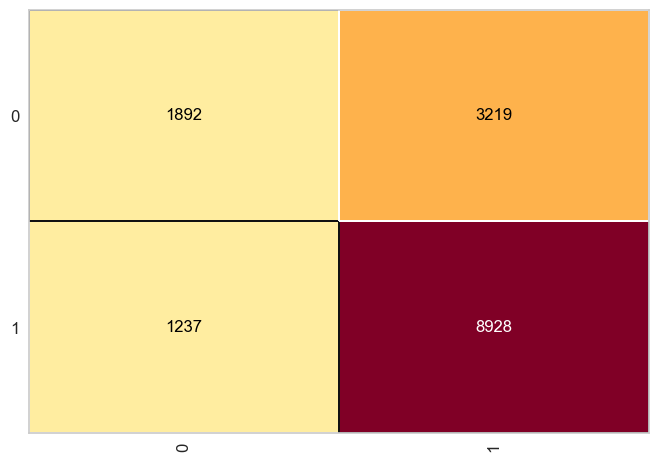

In [205]:
selected_features = feature_importance_df[feature_importance_df['Importance'] > 0]['Feature'].tolist()
X_selected_train = X_train[selected_features]
X_selected_test = X_test[selected_features]
decision_tree.fit(X_selected_train, y_train)
prd_dt = decision_tree.predict(X_selected_test)

cm = ConfusionMatrix(decision_tree)
cm.fit(X_selected_train, y_train)
cm.score(X_selected_test, y_test)

In [206]:
classification_decision = (classification_report(y_test, prd_dt))
print(classification_decision)
accuracy_dt = accuracy_score(y_test, prd_dt)
precision_dt = precision_score(y_test, prd_dt)
recall_dt = recall_score(y_test, prd_dt)
f1_dt  = f1_score(y_test, prd_dt)
auc_dt = roc_auc_score(y_test, prd_dt)
print('f1 Score:',f1_dt)
print('AUC:',auc_dt)
print('accuracy', accuracy_dt)
print('Precision', precision_dt)
print('recall', recall_dt)

              precision    recall  f1-score   support

           0       0.60      0.37      0.46      5111
           1       0.73      0.88      0.80     10165

    accuracy                           0.71     15276
   macro avg       0.67      0.62      0.63     15276
weighted avg       0.69      0.71      0.69     15276

f1 Score: 0.8002868411617067
AUC: 0.6242449399042198
accuracy 0.7083006022518984
Precision 0.7349962953815757
recall 0.8783079193310379


In [36]:
from sklearn.ensemble import RandomForestClassifier

n_estimators = np.array([100])
alg = ['entropy', 'gini']
min_split = np.array([2, 3, 4, 5, 6, 7])
max_nvl = np.array([3, 4, 5, 6, 7, 9, 11])
values_grid = {'n_estimators': n_estimators, 'min_samples_split': min_split, 'max_depth': max_nvl, 'criterion': alg}

model_rf = RandomForestClassifier()
gridRandomForest = GridSearchCV(estimator = model_rf, param_grid = values_grid, cv = 5)
gridRandomForest.fit(X_train, y_train)

print('Algorithm: ', gridRandomForest.best_estimator_.criterion)
print('Score: ', gridRandomForest.best_score_)
print('Mín Split: ', gridRandomForest.best_estimator_.min_samples_split)
print('Max Nvl: ', gridRandomForest.best_estimator_.max_depth)
print('n_estimators: ',gridRandomForest.best_estimator_.n_estimators)

Algorithm:  gini
Score:  0.7293795485126668
Mín Split:  4
Max Nvl:  11
n_estimators:  100


0.72643362136685

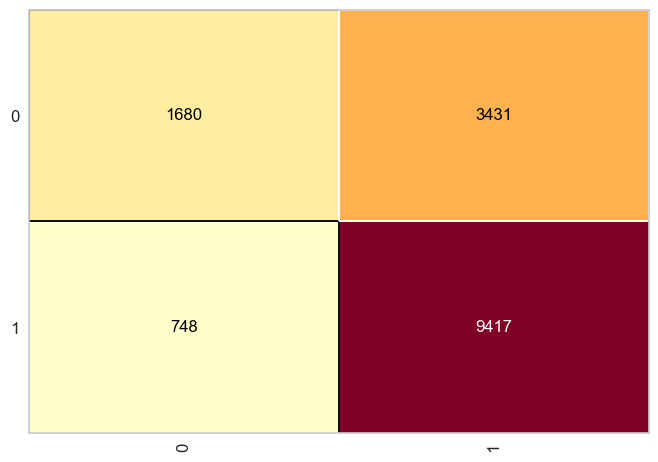

In [37]:
random_forest = RandomForestClassifier(**gridRandomForest.best_params_,
                                       random_state = 0)
random_forest.fit(X_train, y_train)
prd_rf = random_forest.predict(X_test)

cm = ConfusionMatrix(random_forest)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [38]:
accuracy_rf = accuracy_score(y_test, prd_rf)
precision_rf = precision_score(y_test, prd_rf)
recall_rf = recall_score(y_test, prd_dt)
f1_rf  = f1_score(y_test, prd_rf)
auc_rf = roc_auc_score(y_test, prd_rf)
print('f1 Score:',f1_rf)
print('AUC:',auc_rf)
print('accuracy', accuracy_rf)
print('Precision', precision_rf)
print('recall', recall_rf)

f1 Score: 0.8184069873549734
AUC: 0.627558482071837
accuracy 0.72643362136685
Precision 0.7329545454545454
recall 0.8779144121987211


In [39]:
classification_random = (classification_report(y_test, prd_rf))
print(classification_random)

              precision    recall  f1-score   support

           0       0.69      0.33      0.45      5111
           1       0.73      0.93      0.82     10165

    accuracy                           0.73     15276
   macro avg       0.71      0.63      0.63     15276
weighted avg       0.72      0.73      0.69     15276



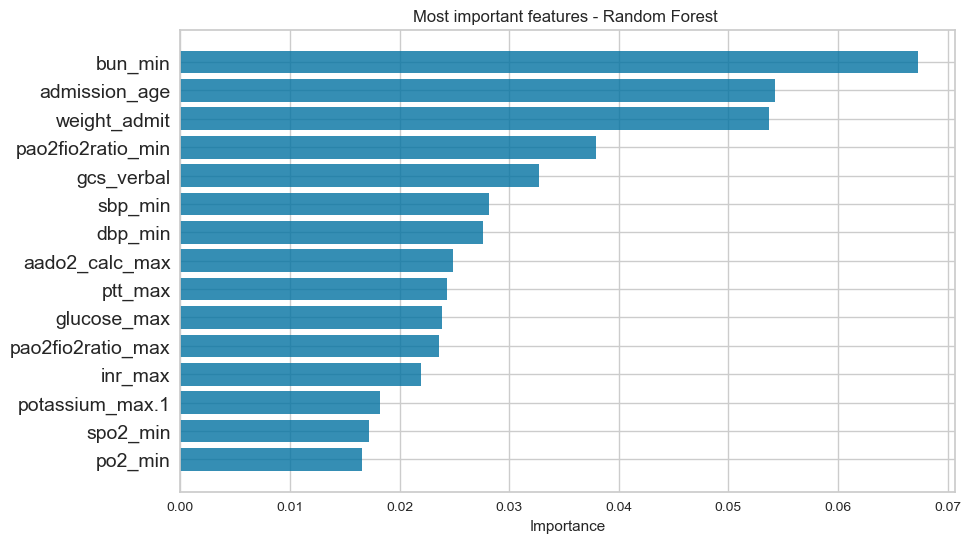

In [207]:
feature_names = columns
feature_imports = random_forest.feature_importances_
most_imp_features = pd.DataFrame([f for f in zip(columns,feature_imports)], columns=["Feature", "Importance"]).nlargest(15, "Importance")
most_imp_features.sort_values(by="Importance", inplace=True)
plt.figure(figsize=(10,6))
plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=0.8)
plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14)
plt.xlabel('Importance')
plt.title('Most important features - Random Forest ')
plt.show()

In [209]:
importances = random_forest.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df[feature_importance_df['Importance']>0])

              Feature  Importance
41            bun_min    0.067343
1       admission_age    0.054284
69       weight_admit    0.053722
30  pao2fio2ratio_min    0.037937
65         gcs_verbal    0.032740
..                ...         ...
64          gcs_motor    0.005757
17           spo2_max    0.004903
63            gcs_min    0.004902
67         gcs_unable    0.003212
0              gender    0.001331

[70 rows x 2 columns]


## XGBoost

In [40]:
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

parameters = {'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.3, 0.5, 0.8],
              'max_depth': [1 , 2, 3, 4, 5, 6, 7, 8, 9],
              'min_child_weight': [1, 3, 5, 7, 9],
              'subsample': [0.1, 0.3, 0.5, 0.7, 0.9],
              'colsample_bytree': [0.1, 0.3, 0.5, 0.7, 0.9],
              'n_estimators': [500],
              'gamma': [0.1, 0.3, 0.5, 0.7, 0.9],
              'reg_alpha': [0.1, 0.3, 0.5, 0.7, 0.9],
              'reg_lambda': [0.1, 0.3, 0.5, 0.7, 0.9]
             }

model_xgb = XGBClassifier(random_state=0)
xgb_random = RandomizedSearchCV(model_xgb, parameters, n_iter=50, cv=3, n_jobs=-1, random_state=0)
xgb_random.fit(X_train, y_train)

print('Score: ', xgb_random.best_score_)
print('Params: ', xgb_random.best_params_)

Score:  0.7442767047322029
Params:  {'subsample': 0.9, 'reg_lambda': 0.9, 'reg_alpha': 0.7, 'n_estimators': 500, 'min_child_weight': 1, 'max_depth': 5, 'learning_rate': 0.05, 'gamma': 0.1, 'colsample_bytree': 0.7}


0.7441738675045824

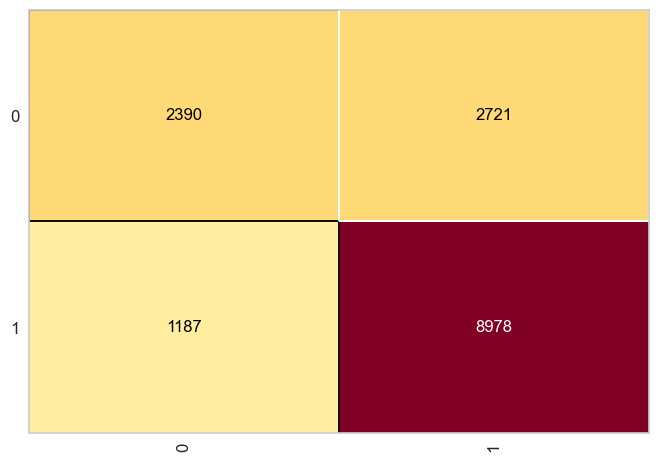

In [41]:
xgb = XGBClassifier(**xgb_random.best_params_, random_state=0)
xgb.fit(X_train, y_train)
prd_xgb = xgb.predict(X_test)

cm = ConfusionMatrix(xgb)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [42]:
classification_xgb_standard = (classification_report(y_test, prd_xgb))
print(classification_xgb_standard)

accuracy_xgb = accuracy_score(y_test, prd_xgb)
precision_xgb = precision_score(y_test, prd_xgb)
recall_xgb = recall_score(y_test, prd_xgb)
f1_xgb  = f1_score(y_test, prd_xgb)
auc_xgb = roc_auc_score(y_test, prd_xgb)
print('f1 Score:',f1_xgb)
print('AUC:',auc_xgb)
print('accuracy', accuracy_xgb)
print('Precision', precision_xgb)
print('recall', recall_xgb)

              precision    recall  f1-score   support

           0       0.67      0.47      0.55      5111
           1       0.77      0.88      0.82     10165

    accuracy                           0.74     15276
   macro avg       0.72      0.68      0.69     15276
weighted avg       0.73      0.74      0.73     15276

f1 Score: 0.8212586900841565
AUC: 0.6754228098822953
accuracy 0.7441738675045824
Precision 0.7674160184631165
recall 0.8832267584849975


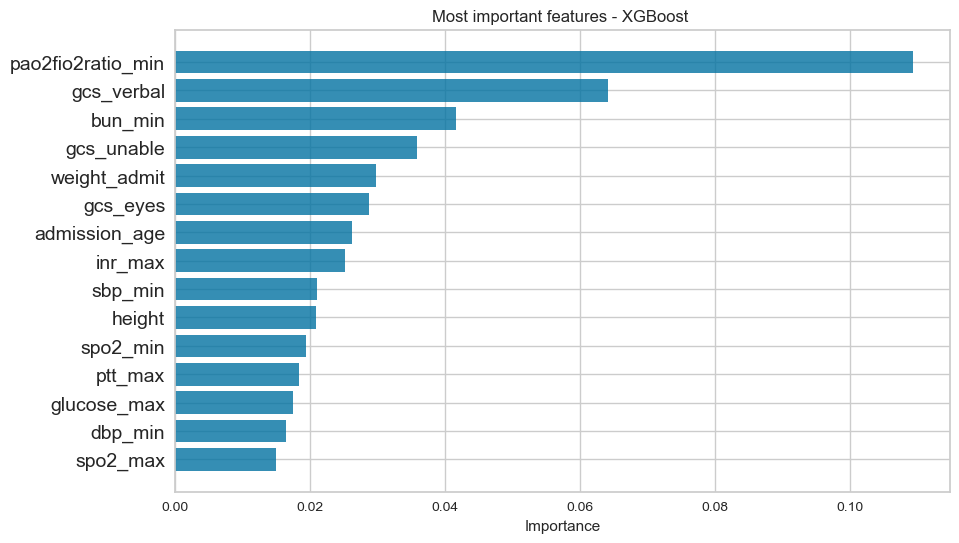

In [210]:
feature_names = columns
feature_imports = xgb.feature_importances_
most_imp_features = pd.DataFrame([f for f in zip(columns,feature_imports)], columns=["Feature", "Importance"]).nlargest(15, "Importance")
most_imp_features.sort_values(by="Importance", inplace=True)
plt.figure(figsize=(10,6))
plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=0.8)
plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14)
plt.xlabel('Importance')
plt.title('Most important features - XGBoost ')
plt.show()

In [211]:
importances = xgb.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df[feature_importance_df['Importance']>0])

                Feature  Importance
30    pao2fio2ratio_min    0.109276
65           gcs_verbal    0.064097
41              bun_min    0.041610
67           gcs_unable    0.035852
69         weight_admit    0.029700
..                  ...         ...
37              wbc_min    0.007261
54  abs_neutrophils_min    0.007237
8               dbp_max    0.007172
35     hemoglobin_max.1    0.007106
48         sodium_min.1    0.006755

[70 rows x 2 columns]


In [43]:
from sklearn.ensemble import AdaBoostClassifier

n_estimators = np.array([500])
learning_rate = np.array([2.0, 2.5, 1.9, 1.7, 0.5, 0.4])
values_grid = {'n_estimators': n_estimators, 'learning_rate': learning_rate}

model_adb = AdaBoostClassifier()
gridAdaBoost = GridSearchCV(estimator = model_adb, param_grid = values_grid, cv = 5, n_jobs = -1)
gridAdaBoost.fit(X_train, y_train)

print('Learning Rate: ', gridAdaBoost.best_estimator_.learning_rate)
print('Score: ', gridAdaBoost.best_score_)

Learning Rate:  0.4
Score:  0.7382730848013497


0.7397879025923016

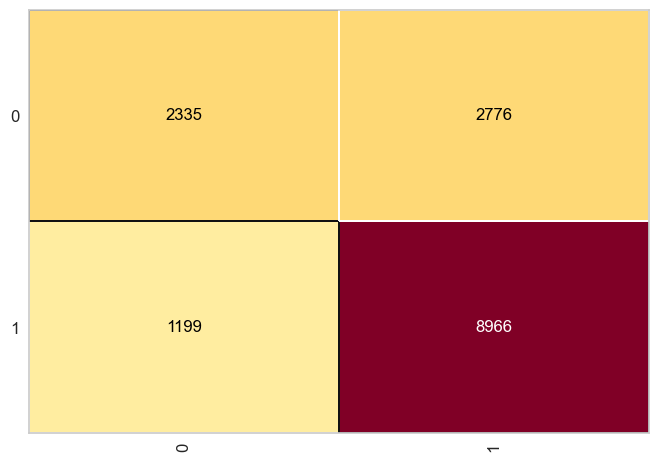

In [44]:
ada_boost = AdaBoostClassifier(**gridAdaBoost.best_params_, random_state = 0)
ada_boost.fit(X_train, y_train)
prd_adb = ada_boost.predict(X_test)

cm = ConfusionMatrix(ada_boost)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [45]:
classification_ada_scaler = (classification_report(y_test, prd_adb))
print(classification_ada_scaler)

accuracy_adb = accuracy_score(y_test, prd_adb)
precision_adb = precision_score(y_test, prd_adb)
recall_adb = recall_score(y_test, prd_adb)
f1_adb  = f1_score(y_test, prd_adb)
auc_adb = roc_auc_score(y_test, prd_adb)
print('f1 Score:',f1_adb)
print('AUC:',auc_adb)
print('accuracy', accuracy_adb)
print('Precision', precision_adb)
print('recall', recall_adb)

              precision    recall  f1-score   support

           0       0.66      0.46      0.54      5111
           1       0.76      0.88      0.82     10165

    accuracy                           0.74     15276
   macro avg       0.71      0.67      0.68     15276
weighted avg       0.73      0.74      0.73     15276

f1 Score: 0.8185511480348747
AUC: 0.6694519974326951
accuracy 0.7397879025923016
Precision 0.7635837165729858
recall 0.8820462370880472


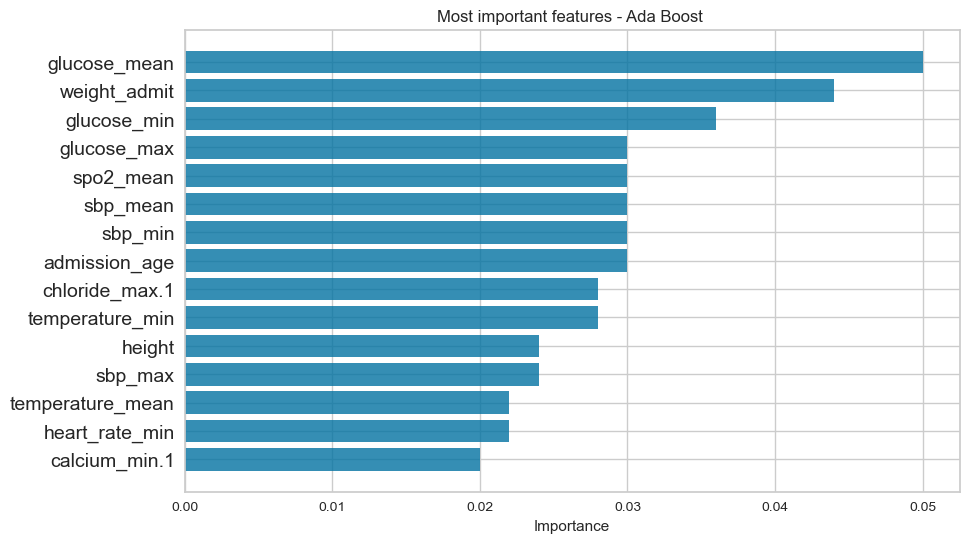

In [212]:

feature_names = columns
feature_imports = ada_boost.feature_importances_
most_imp_features = pd.DataFrame([f for f in zip(columns,feature_imports)], columns=["Feature", "Importance"]).nlargest(15, "Importance")
most_imp_features.sort_values(by="Importance", inplace=True)
plt.figure(figsize=(10,6))
plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=0.8)
plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14)
plt.xlabel('Importance')
plt.title('Most important features - Ada Boost ')
plt.show()

In [214]:
importances = ada_boost.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df[feature_importance_df['Importance']>0])

              Feature  Importance
21       glucose_mean       0.050
69       weight_admit       0.044
19        glucose_min       0.036
6            sbp_mean       0.030
20        glucose_max       0.030
..                ...         ...
64          gcs_motor       0.004
65         gcs_verbal       0.004
53  abs_monocytes_min       0.004
57            ptt_min       0.002
40  bicarbonate_max.1       0.002

[68 rows x 2 columns]


In [46]:
from sklearn.ensemble import GradientBoostingClassifier

n_estimators = [100, 300]
learning_rate = [0.01, 0.1]
values_grid = {'n_estimators': n_estimators, 'learning_rate': learning_rate}

model_gbdt = GradientBoostingClassifier()
gridGradient = GridSearchCV(estimator=model_gbdt, param_grid=values_grid, cv=5, n_jobs=-1)
gridGradient.fit(X_train, y_train)

print('Learning Rate: ', gridGradient.best_estimator_.learning_rate)
print('Score: ', gridGradient.best_score_)

Learning Rate:  0.1
Score:  0.7413870945549068


0.7435192458758837

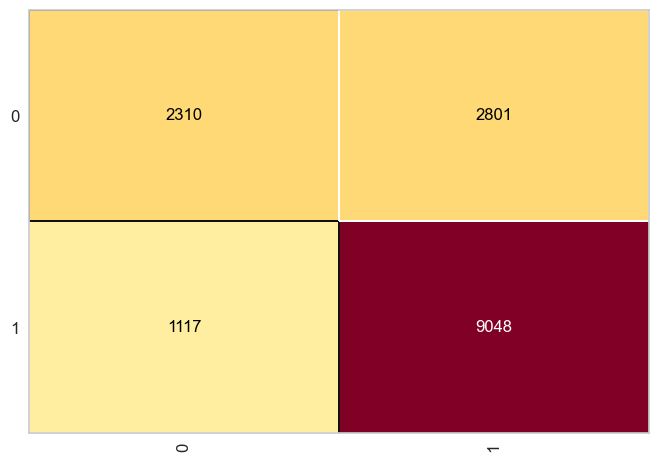

In [47]:
grad_boost = GradientBoostingClassifier(**gridGradient.best_params_, 
                                        random_state = 0)
grad_boost.fit(X_train, y_train)
prd_gb = grad_boost.predict(X_test)

cm = ConfusionMatrix(grad_boost)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [48]:
accuracy_gb = accuracy_score(y_test, prd_gb)
precision_gb = precision_score(y_test, prd_gb)
recall_gb = recall_score(y_test, prd_gb)
f1_gb  = f1_score(y_test, prd_gb)
auc_gb = roc_auc_score(y_test, prd_gb)

classification_ada_scaler = (classification_report(y_test, prd_adb))
print(classification_ada_scaler)

print('f1 Score:',f1_gb)
print('AUC:',auc_gb)
print('accuracy', accuracy_gb)
print('Precision', precision_gb)
print('recall', recall_gb)

              precision    recall  f1-score   support

           0       0.66      0.46      0.54      5111
           1       0.76      0.88      0.82     10165

    accuracy                           0.74     15276
   macro avg       0.71      0.67      0.68     15276
weighted avg       0.73      0.74      0.73     15276

f1 Score: 0.8220223494140092
AUC: 0.6710397401975216
accuracy 0.7435192458758837
Precision 0.7636087433538695
recall 0.8901131333005411


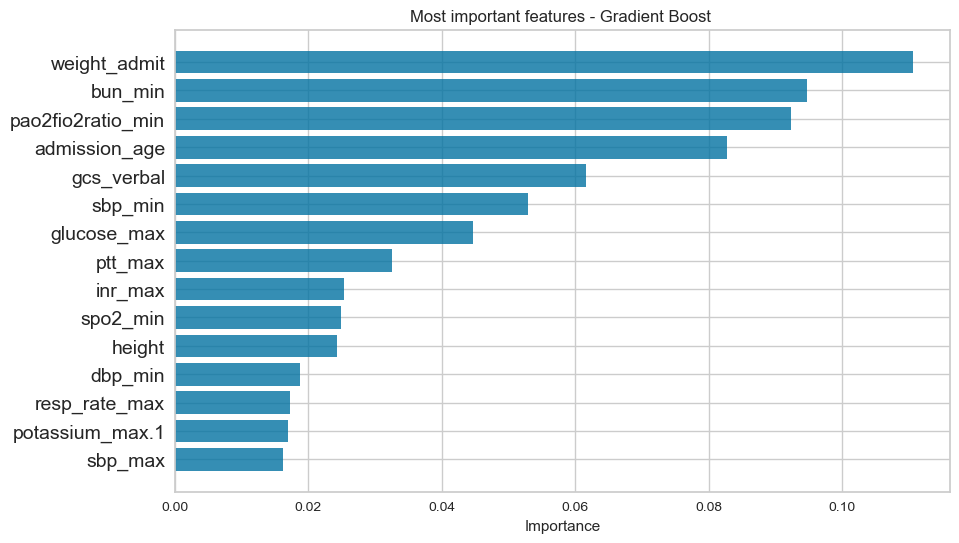

In [218]:

feature_names = columns
feature_imports = grad_boost.feature_importances_
most_imp_features = pd.DataFrame([f for f in zip(columns,feature_imports)], columns=["Feature", "Importance"]).nlargest(15, "Importance")
most_imp_features.sort_values(by="Importance", inplace=True)
plt.figure(figsize=(10,6))
plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=0.8)
plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14)
plt.xlabel('Importance')
plt.title('Most important features - Gradient Boost ')
plt.show()

In [219]:
importances = ada_boost.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df[feature_importance_df['Importance']>0])

              Feature  Importance
21       glucose_mean       0.050
69       weight_admit       0.044
19        glucose_min       0.036
6            sbp_mean       0.030
20        glucose_max       0.030
..                ...         ...
64          gcs_motor       0.004
65         gcs_verbal       0.004
53  abs_monocytes_min       0.004
57            ptt_min       0.002
40  bicarbonate_max.1       0.002

[68 rows x 2 columns]


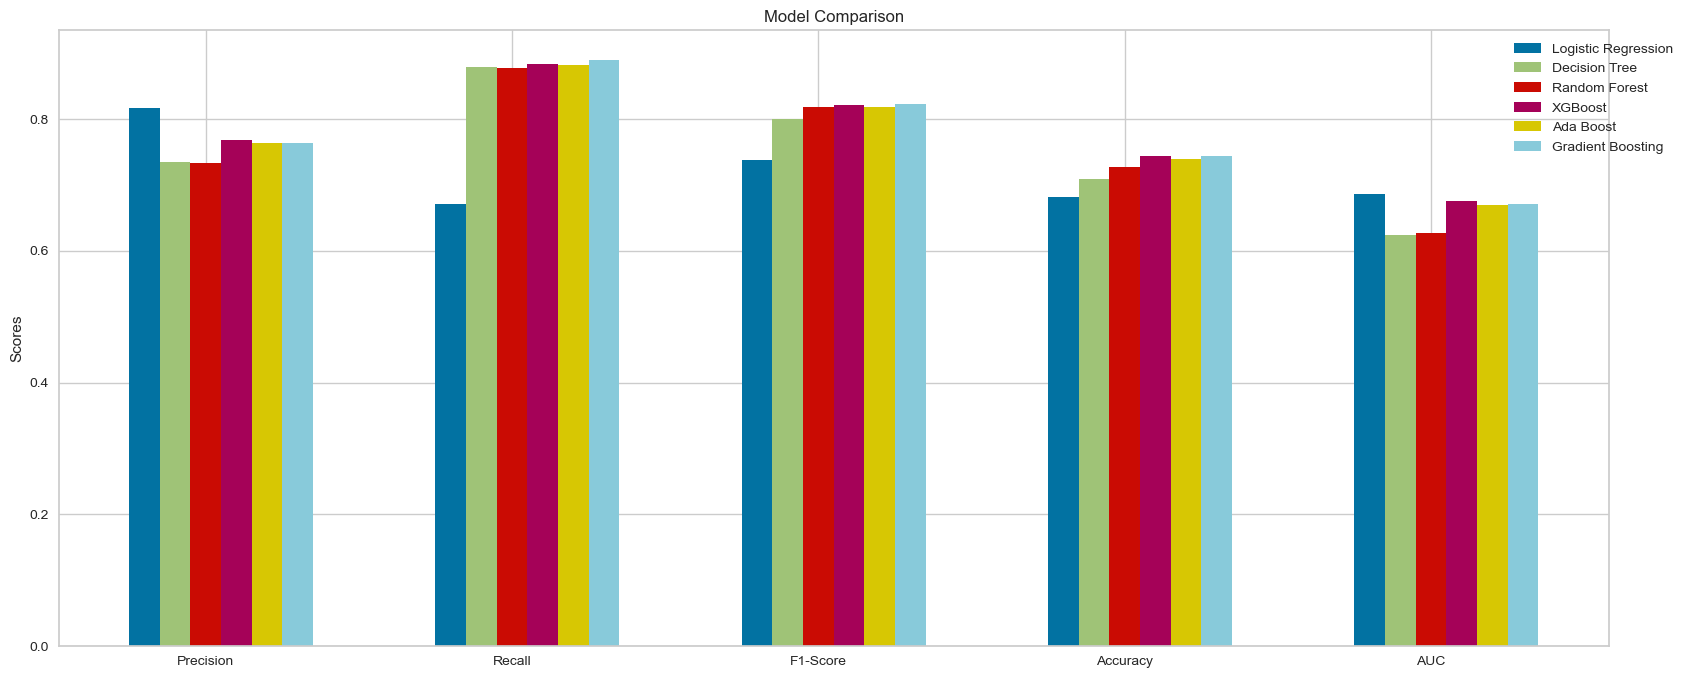

In [220]:
import matplotlib.pyplot as plt
import numpy as np

labels = ['Precision', 'Recall', 'F1-Score', 'Accuracy', 'AUC']
lr = [precision_lr, recall_lr, f1_lr, accuracy_lr, auc_lr]
dt = [precision_dt, recall_dt, f1_dt, accuracy_dt, auc_dt]
rf = [precision_rf, recall_rf, f1_rf, accuracy_rf, auc_rf]
xgb = [precision_xgb, recall_xgb, f1_xgb, accuracy_xgb, auc_xgb]
adb = [precision_adb, recall_adb, f1_adb, accuracy_adb, auc_adb]
gb = [precision_gb, recall_gb, f1_gb, accuracy_gb, auc_gb]

x =  2*np.arange(len(labels))  # the label locations
width = 0.2 # increase the width of the bars


fig, ax = plt.subplots(figsize=(20, 8))
rects1 = ax.bar(x - 2*width, lr, width, label='Logistic Regression')
rects2 = ax.bar(x - width, dt, width, label='Decision Tree')
rects3 = ax.bar(x, rf, width, label='Random Forest')  # Corrected label
rects4 = ax.bar(x + width, xgb, width, label='XGBoost')  # Corrected label
rects5 = ax.bar(x + 2*width, adb, width, label='Ada Boost')  # Corrected label
rects5 = ax.bar(x + 3*width, gb, width, label='Gradient Boosting')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Model Comparison')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(bbox_to_anchor=(1.05, 1))

# Display the plot
plt.show()

In [221]:
data = {
    'Labels': labels,
    'Logistic Regression': lr,
    'Decision Tree': dt,
    'Random Forest': rf,
    'XGBoost': xgb,
    'AdaBoost': adb,
    'Gradient Boosting': gb
}

comp = pd.DataFrame(data)
comp = comp.set_index('Labels').T
comp

Labels,Precision,Recall,F1-Score,Accuracy,AUC
Logistic Regression,0.817072,0.671422,0.737121,0.681330,0.686229
Decision Tree,0.734996,0.878308,0.800287,0.708301,0.624245
Random Forest,0.732955,0.877914,0.818407,0.726434,0.627558
XGBoost,0.767416,0.883227,0.821259,0.744174,0.675423
AdaBoost,0.763584,0.882046,0.818551,0.739788,0.669452
Gradient Boosting,0.763609,0.890113,0.822022,0.743519,0.671040


In [65]:
data2

,aki,gender,admission_age,heart_rate_min,heart_rate_max,sbp_min,sbp_max,sbp_mean,dbp_min,dbp_max,...,alp_max,ast_max,bilirubin_total_min,gcs_min,gcs_motor,gcs_verbal,gcs_eyes,gcs_unable,height,weight_admit
0,1,0,0.868796,1.724950,0.073730,0.556180,-0.978644,-0.181080,-0.625309,-1.544616,...,12.765507,0.053521,2.195521,0.488466,0.495929,0.766355,0.786547,-0.507323,-1.711276,0.795813
1,0,0,0.766992,0.138692,1.539611,0.213991,-0.934621,-0.566361,0.738435,0.032401,...,2.708247,0.238179,0.325871,0.488466,0.495929,0.766355,0.786547,-0.507323,0.024382,0.014652
2,1,0,0.038221,-0.654437,-0.268309,0.099928,-0.230257,-0.424516,0.738435,0.541117,...,-0.176843,-0.126520,-0.170158,0.488466,0.495929,0.766355,0.786547,-0.507323,0.024382,-0.540531
3,1,0,-0.002048,-0.720531,-0.756936,1.126496,0.077902,1.165145,1.079371,0.286759,...,-0.246363,-0.151911,-0.132002,0.488466,-2.521553,-1.630505,-1.928713,1.971129,0.024382,0.882299
4,1,1,-0.434258,-0.852719,-0.121721,-0.698514,-0.934621,-1.309731,-0.028671,0.337630,...,-0.431751,-0.148448,-0.170158,0.488466,0.495929,-1.630505,-1.928713,1.971129,1.092480,0.444290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50915,0,1,0.071353,-1.579753,0.073730,0.328054,0.606175,0.668705,0.397499,1.304190,...,-0.698245,-0.154219,-0.322783,-0.267749,0.495929,-0.192389,0.786547,-0.507323,0.024382,0.731646
50916,1,0,-0.457695,1.592762,0.464632,-0.242262,-1.771053,-1.320253,0.567967,-0.527186,...,-0.443337,-0.059582,0.211403,0.488466,0.495929,-1.630505,-1.023626,1.971129,0.024382,-1.039916
50917,0,0,-0.552292,-0.125684,2.907767,-0.584451,-0.714507,-0.372794,-0.369607,-0.120213,...,-0.408577,0.069679,-0.246470,-4.048825,-2.521553,-1.151133,-1.928713,-0.507323,0.024382,-0.041146
50918,1,0,0.064626,-0.786625,-1.001250,-0.071167,0.165947,-0.377888,0.056563,0.541117,...,-0.570791,-0.147294,0.249559,0.110358,0.495929,0.766355,-0.118539,-0.507323,0.024382,0.380124
